In [21]:
import requests
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json
from config import weather_api_key

In [22]:
url = "https://api.openweathermap.org/data/3.0/onecall/timemachine?"
units = "imperial"

# Reading CSV Data

In [23]:
# Reading the CSV
uber_csv = pd.read_csv("Resources/uber.csv")

uber_df = pd.DataFrame(uber_csv)

uber_df.head()



,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [24]:
# Renaming the headers
uber_df.rename(columns = {'Unnamed: 0':'ID', 'key':'N/A', 'fare_amount':'Charge', "pickup_datetime":"Pickup Time",  "pickup_longitude": "Pickup Lon", "pickup_latitude":"Pickup Lat",  
                          "dropoff_longitude": "Dropoff Lon", "dropoff_latitude": "Dropoff Lat", "passenger_count": "Passenger Count"}, inplace = True)

uber_df.head()



,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [25]:
# Grabbing a sample of the data
uber_df3 = uber_df.sample(n=5)
uber_df3.head()

,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count
147744,55224804,2012-05-19 15:10:00.00000081,5.7,2012-05-19 15:10:00 UTC,-73.961626,40.780511,-73.944461,40.778239,1
7073,49213627,2009-09-25 18:06:00.000000135,6.1,2009-09-25 18:06:00 UTC,-73.865198,40.770625,-73.872892,40.774417,5
143854,26290939,2010-03-10 22:42:00.00000075,2.5,2010-03-10 22:42:00 UTC,-73.959483,40.775185,-73.959427,40.775485,1
84180,23819267,2009-12-08 20:20:36.0000003,6.1,2009-12-08 20:20:36 UTC,-73.981944,40.760889,-73.982103,40.770607,1
67324,51146762,2014-10-05 21:56:59.0000003,6.0,2014-10-05 21:56:59 UTC,-73.948424,40.718357,-73.962800,40.711846,1


# Formatting Data

In [26]:
# Formatting the date step one
uber_df3['Date Formatted'] = (pd.to_datetime(uber_df3['Pickup Time'], yearfirst=True, utc=True)) 
 
uber_df3.head()


,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted
147744,55224804,2012-05-19 15:10:00.00000081,5.7,2012-05-19 15:10:00 UTC,-73.961626,40.780511,-73.944461,40.778239,1,2012-05-19 15:10:00+00:00
7073,49213627,2009-09-25 18:06:00.000000135,6.1,2009-09-25 18:06:00 UTC,-73.865198,40.770625,-73.872892,40.774417,5,2009-09-25 18:06:00+00:00
143854,26290939,2010-03-10 22:42:00.00000075,2.5,2010-03-10 22:42:00 UTC,-73.959483,40.775185,-73.959427,40.775485,1,2010-03-10 22:42:00+00:00
84180,23819267,2009-12-08 20:20:36.0000003,6.1,2009-12-08 20:20:36 UTC,-73.981944,40.760889,-73.982103,40.770607,1,2009-12-08 20:20:36+00:00
67324,51146762,2014-10-05 21:56:59.0000003,6.0,2014-10-05 21:56:59 UTC,-73.948424,40.718357,-73.962800,40.711846,1,2014-10-05 21:56:59+00:00


In [27]:
# Final Formatted date added to dataframe
uber_df3['Date Formatted Final'] = (uber_df3["Date Formatted"] - pd.Timestamp("1970-01-01", tz="UTC")) // pd.Timedelta('1s')

uber_df3.head()

,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted,Date Formatted Final
147744,55224804,2012-05-19 15:10:00.00000081,5.7,2012-05-19 15:10:00 UTC,-73.961626,40.780511,-73.944461,40.778239,1,2012-05-19 15:10:00+00:00,1337440200
7073,49213627,2009-09-25 18:06:00.000000135,6.1,2009-09-25 18:06:00 UTC,-73.865198,40.770625,-73.872892,40.774417,5,2009-09-25 18:06:00+00:00,1253901960
143854,26290939,2010-03-10 22:42:00.00000075,2.5,2010-03-10 22:42:00 UTC,-73.959483,40.775185,-73.959427,40.775485,1,2010-03-10 22:42:00+00:00,1268260920
84180,23819267,2009-12-08 20:20:36.0000003,6.1,2009-12-08 20:20:36 UTC,-73.981944,40.760889,-73.982103,40.770607,1,2009-12-08 20:20:36+00:00,1260303636
67324,51146762,2014-10-05 21:56:59.0000003,6.0,2014-10-05 21:56:59 UTC,-73.948424,40.718357,-73.962800,40.711846,1,2014-10-05 21:56:59+00:00,1412546219


In [28]:
#Creating the clean dataframe
clean_df = uber_df3[["ID", "Charge", "Pickup Lon", "Pickup Lat", "Dropoff Lon", "Dropoff Lat", "Passenger Count", "Date Formatted Final" ]]


clean_df.head()

,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final
147744,55224804,5.7,-73.961626,40.780511,-73.944461,40.778239,1,1337440200
7073,49213627,6.1,-73.865198,40.770625,-73.872892,40.774417,5,1253901960
143854,26290939,2.5,-73.959483,40.775185,-73.959427,40.775485,1,1268260920
84180,23819267,6.1,-73.981944,40.760889,-73.982103,40.770607,1,1260303636
67324,51146762,6.0,-73.948424,40.718357,-73.962800,40.711846,1,1412546219


# Gathering info for our hypothesis tests

In [29]:
# Making the list for data 
uber_data = []

# Looping through the data
for i, row in clean_df.iterrows():

    # Gathering the latitude, longitude, and pickup time
    lat = row['Pickup Lat']
    lon = row['Pickup Lon']
    date = row['Date Formatted Final'].astype(int)
    
    # Making the query for the search using the varibles
    query_url = f"{url}lat={lat}&lon={lon}&dt={date}&appid={weather_api_key}&units={units}"
    
    # Getting the info from the api
    response = requests.get(query_url).json()

    # Gathering variables for statistics
    temp = response['data'][0]['temp']
    hum = response['data'][0]['humidity']
    desc = response['data'][0]['weather'][0]['description']

    # Placing variables into a dictionary
    uber_data.append({"Pickup Lat": lat,
                            "Temp (F)": temp,
                            "Humidity %": hum,
                            "Description": desc
    })


    
    
   

In [30]:
# Making the weather dataframe
weather_df = pd.DataFrame(uber_data)

weather_df.head()

,Pickup Lat,Temp (F),Humidity %,Description
0,40.780511,72.48,39,few clouds
1,40.770625,67.51,44,scattered clouds
2,40.775185,52.11,37,overcast clouds
3,40.760889,43.23,44,clear sky
4,40.718357,58.06,44,clear sky


In [31]:
# Merging the data for statistical use
final_df = clean_df.merge(weather_df, on = "Pickup Lat")

final_df.head()

,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final,Temp (F),Humidity %,Description
0,55224804,5.7,-73.961626,40.780511,-73.944461,40.778239,1,1337440200,72.48,39,few clouds
1,49213627,6.1,-73.865198,40.770625,-73.872892,40.774417,5,1253901960,67.51,44,scattered clouds
2,26290939,2.5,-73.959483,40.775185,-73.959427,40.775485,1,1268260920,52.11,37,overcast clouds
3,23819267,6.1,-73.981944,40.760889,-73.982103,40.770607,1,1260303636,43.23,44,clear sky
4,51146762,6.0,-73.948424,40.718357,-73.962800,40.711846,1,1412546219,58.06,44,clear sky


In [40]:
weather_labels = final_df["Description"].unique()
weather_count = final_df["Description"].value_counts()
weather_count

clear sky                  22
overcast clouds             6
few clouds                  5
scattered clouds            4
light rain                  4
broken clouds               3
mist                        2
moderate rain               1
haze                        1
snow                        1
light intensity drizzle     1
Name: Description, dtype: int64

# Graphing the data
Now we must take a closer look to understand this data

In [43]:
# Creating a linear regression fuction
def lregress(x, y, var):
    
    res = stats.linregress(x, y)

    print(f"R-squared: {res.rvalue**2:.6f}")

    plt.scatter(x, y, marker="d", color="red", label= "Data")
    plt.plot(x, res.intercept + res.slope*x, label = "Regression Line")
    plt.title("Linear Regression")
    plt.xlabel("Latitude")
    plt.ylabel(f"{var}")
    plt.legend()
    plt.show()

## Weather vs. Uber Rides



([<matplotlib.patches.Wedge at 0x27de13b5408>,
 [Text(0.2061194541375137, 1.080515974257694, 'few clouds'),
  Text(-1.0999999999999999, 2.5747358557800545e-08, 'scattered clouds'),
  Text(-0.8475645860912691, -0.7011663657106891, 'overcast clouds'),
  Text(-0.33991872319707345, -1.046162158377023, 'clear sky'),
  Text(0.20611940355490968, -1.080515983906841, 'mist'),
  Text(0.6465637337786141, -0.8899187255936677, 'light intensity drizzle'),
  Text(0.889918657491039, -0.6465638275138403, 'moderate rain'),
  Text(0.9953097294288745, -0.4683572808275973, 'broken clouds'),
  Text(1.0461621464424646, -0.33991875992786225, 'light rain'),
  Text(1.080515962196257, -0.20611951736576775, 'snow'),
  Text(1.0978293965180277, -0.06906964703010687, 'haze')],
 [Text(0.11242879316591656, 0.5893723495951058, '44.0%'),
  Text(-0.5999999999999999, 1.4044013758800295e-08, '12.0%'),
  Text(-0.4623079560497831, -0.38245438129673953, '10.0%'),
  Text(-0.18541021265294913, -0.5706339045692852, '8.0%'),
  Te

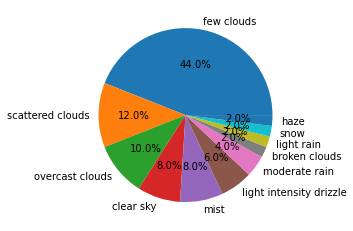

In [33]:
plt.pie(weather_count, labels = weather_labels, autopct = "%1.1f%%")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

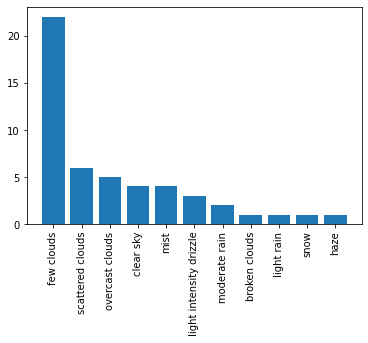

In [34]:
plt.bar(weather_labels, weather_count)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

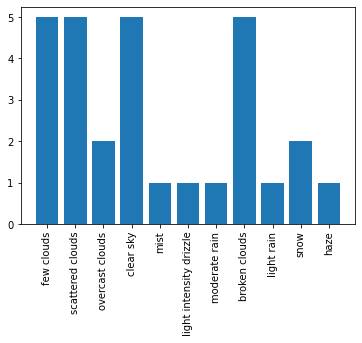

In [42]:
plt.bar(final_df["Description"], final_df["Passenger Count"])
plt.xticks(rotation = 90)

## Latitude vs. Weather

Text(0, 0.5, 'Temperature (F)')

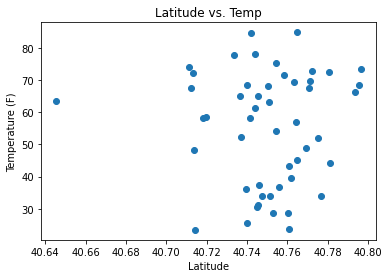

In [35]:
plt.scatter(final_df["Pickup Lat"], final_df["Temp (F)"])
plt.title("Latitude vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

R-squared: 0.000060


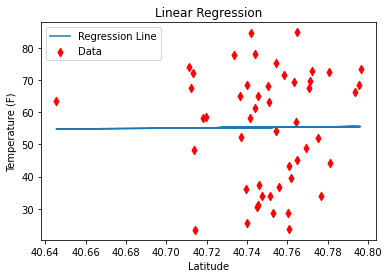

In [44]:
lregress(final_df["Pickup Lat"], final_df["Temp (F)"], "Temperature (F)")